In [1]:
pip install beautifulsoup4 pandas requests

In [2]:
pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd

stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META']
data_frames = []

for stock in stocks:
    try:
        print(f"Fetching data for {stock}...")
        data = yf.download(stock, start="2023-01-01", end="2025-01-01")
        if not data.empty:
            data['Stock'] = stock
            data_frames.append(data)
        else:
            print(f"No data found for {stock}")
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")

# Combine and save if any data was fetched
if data_frames:
    final_df = pd.concat(data_frames)
    final_df.to_csv('mag7_stocks_2024.csv')
    print("Data saved to mag7_stocks_2024.csv")
else:
    print("No data available for the specified stocks and date range.")


Fetching data for AAPL...
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: No data found for this date range, symbol may be delisted
No data found for AAPL
Fetching data for MSFT...
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MSFT: No data found for this date range, symbol may be delisted
No data found for MSFT
Fetching data for GOOGL...
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GOOGL: No data found for this date range, symbol may be delisted
No data found for GOOGL
Fetching data for AMZN...
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMZN: No data found for this date range, symbol may be delisted
No data found for AMZN
Fetching data for NVDA...
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NVDA: No data found for this date range, symbol may be delisted


In [4]:
pip install alpha_vantage pandas

In [5]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Initialize API key and TimeSeries object
api_key = "YOUR_ALPHA_VANTAGE_API_KEY"
ts = TimeSeries(key=api_key, output_format='pandas')

# List of Magnificent 7 stocks
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META']
data_frames = []

# Fetch and store data for each stock
for stock in stocks:
    try:
        print(f"Fetching data for {stock}...")
        data, meta_data = ts.get_daily(symbol=stock, outputsize='full')
        data['Stock'] = stock  # Add a column for the stock name
        data.reset_index(inplace=True)  # Reset the index for easier handling
        
        # Filter for dates in 2024 and 2025
        data['date'] = pd.to_datetime(data['date'])  # Ensure the date column is in datetime format
        data = data[(data['date'] >= '2024-01-01') & (data['date'] <= '2025-12-31')]
        
        # Append filtered data
        data_frames.append(data)
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")

# Combine all stock data into one DataFrame
if data_frames:
    combined_data = pd.concat(data_frames)
    combined_data.to_csv('mag7_stocks_2024_2025.csv', index=False)
    print("Data saved to mag7_stocks_2024_2025.csv")
else:
    print("No data fetched.")


Fetching data for AAPL...
Fetching data for MSFT...
Fetching data for GOOGL...
Fetching data for AMZN...
Fetching data for NVDA...
Fetching data for TSLA...
Fetching data for META...
Data saved to mag7_stocks_2024_2025.csv


In [6]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('mag7_stocks_2024_2025.csv')

# Preview the first few rows
data

,date,1. open,2. high,3. low,4. close,5. volume,Stock
0,2025-01-17,232.115,232.2900,228.4800,229.98,68488301.0,AAPL
1,2025-01-16,237.350,238.0100,228.0300,228.26,71759052.0,AAPL
2,2025-01-15,234.635,238.9600,234.4300,237.87,39831969.0,AAPL
3,2025-01-14,234.750,236.1200,232.4720,233.28,39435294.0,AAPL
4,2025-01-13,233.530,234.6700,229.7200,234.40,49630725.0,AAPL
...,...,...,...,...,...,...,...
1836,2024-01-08,354.700,358.9800,352.0500,358.66,13890222.0,META
1837,2024-01-05,346.990,353.5000,346.2601,351.95,13919573.0,META
1838,2024-01-04,344.500,348.1499,343.3987,347.12,12099895.0,META
1839,2024-01-03,344.980,347.9500,343.1750,344.47,15451133.0,META


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1841 non-null   object 
 1   1. open    1841 non-null   float64
 2   2. high    1841 non-null   float64
 3   3. low     1841 non-null   float64
 4   4. close   1841 non-null   float64
 5   5. volume  1841 non-null   float64
 6   Stock      1841 non-null   object 
dtypes: float64(5), object(2)
memory usage: 100.8+ KB


In [8]:
import pandas as pd

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Verify the conversion
print(data.dtypes)  # 'date' should now have dtype 'datetime64[ns]'

date         datetime64[ns]
1. open             float64
2. high             float64
3. low              float64
4. close            float64
5. volume           float64
Stock                object
dtype: object


In [9]:
data.columns

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume',
       'Stock'],
      dtype='object')

In [10]:
data.describe()

,date,1. open,2. high,3. low,4. close,5. volume
count,1841,1841.000000,1841.000000,1841.000000,1841.000000,1.841000e+03
mean,2024-07-09 20:37:24.866920192,306.955257,310.942416,302.733779,307.041040,6.232049e+07
min,2024-01-02 00:00:00,92.060000,103.410000,90.690000,98.910000,4.726056e+06
25%,2024-04-05 00:00:00,174.150000,176.190000,172.270000,174.370000,2.028688e+07
50%,2024-07-11 00:00:00,217.070000,220.200000,214.210000,217.530000,3.716762e+07
75%,2024-10-14 00:00:00,424.300000,427.460000,419.750000,424.570000,6.628953e+07
max,2025-01-17 00:00:00,1240.480000,1255.870000,1183.200000,1224.400000,6.554847e+08
std,NaN,191.578873,194.597503,188.153304,191.720876,7.714074e+07


In [11]:
data['Stock'].unique()

array(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META'],
      dtype=object)

In [14]:
# Add a column for daily returns
data['daily_return'] = data.groupby('Stock')['4. close'].pct_change()* 100

# Summary statistics for daily returns
print(data.groupby('Stock')['daily_return'].describe())

       count      mean        std        min       25%       50%       75%  \
Stock                                                                        
AAPL   262.0 -0.071549   1.426561  -6.772870 -0.855659 -0.153658  0.706046   
AMZN   262.0 -0.140926   1.765022  -7.292940 -1.222229 -0.072359  0.869292   
GOOGL  262.0 -0.118055   1.752048  -9.275952 -1.014780 -0.319628  0.832710   
META   262.0 -0.192845   2.207048 -16.886671 -1.205855 -0.090675  0.796065   
MSFT   262.0 -0.047689   1.263838  -2.591023 -0.908663 -0.113143  0.614195   
NVDA   262.0  3.062866  55.262443 -14.089995 -2.425052 -0.359879  1.675528   
TSLA   262.0 -0.128595   3.919198 -17.978348 -2.199315 -0.138762  2.040254   

              max  
Stock              
AAPL     5.060448  
AMZN     9.630733  
GOOGL    8.108494  
META    11.808419  
MSFT     6.442722  
NVDA   892.593809  
TSLA    14.070096  


In [15]:
data['daily_return'] = data.groupby('Stock')['4. close'].pct_change() 

In [16]:
data

,date,1. open,2. high,3. low,4. close,5. volume,Stock,daily_return
0,2025-01-17,232.115,232.2900,228.4800,229.98,68488301.0,AAPL,NaN
1,2025-01-16,237.350,238.0100,228.0300,228.26,71759052.0,AAPL,-0.007479
2,2025-01-15,234.635,238.9600,234.4300,237.87,39831969.0,AAPL,0.042101
3,2025-01-14,234.750,236.1200,232.4720,233.28,39435294.0,AAPL,-0.019296
4,2025-01-13,233.530,234.6700,229.7200,234.40,49630725.0,AAPL,0.004801
...,...,...,...,...,...,...,...,...
1836,2024-01-08,354.700,358.9800,352.0500,358.66,13890222.0,META,0.003441
1837,2024-01-05,346.990,353.5000,346.2601,351.95,13919573.0,META,-0.018709
1838,2024-01-04,344.500,348.1499,343.3987,347.12,12099895.0,META,-0.013724
1839,2024-01-03,344.980,347.9500,343.1750,344.47,15451133.0,META,-0.007634


In [17]:
# Calculate volatility (standard deviation of daily returns)
volatility = data.groupby('Stock')['daily_return'].std().sort_values(ascending=False)
print("Stock Volatility:\n", volatility)

Stock Volatility:
 Stock
NVDA     0.552624
TSLA     0.039192
META     0.022070
AMZN     0.017650
GOOGL    0.017520
AAPL     0.014266
MSFT     0.012638
Name: daily_return, dtype: float64


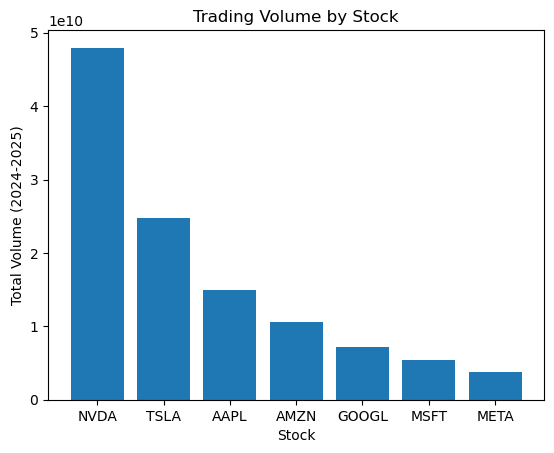

In [13]:
# Compare trading volumes across stocks
volume_data = data.groupby('Stock')['5. volume'].sum().reset_index()
volume_data = volume_data.sort_values(by='5. volume', ascending=False)

# Plot
plt.bar(volume_data['Stock'], volume_data['5. volume'])
plt.xlabel('Stock')
plt.ylabel('Total Volume (2024-2025)')
plt.title('Trading Volume by Stock')
plt.show()


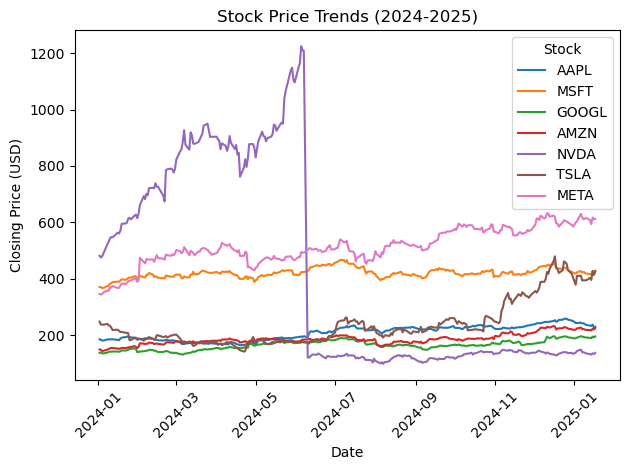

In [12]:
import matplotlib.pyplot as plt

# Plot closing prices for each stock
for stock in data['Stock'].unique():  # Ensure correct case for 'Stock'
    stock_data = data[data['Stock'] == stock]  # Filter data for the stock
    plt.plot(stock_data['date'], stock_data['4. close'], label=stock)  # Use correct column names

# Configure plot labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Stock Price Trends (2024-2025)')
plt.legend(title='Stock')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

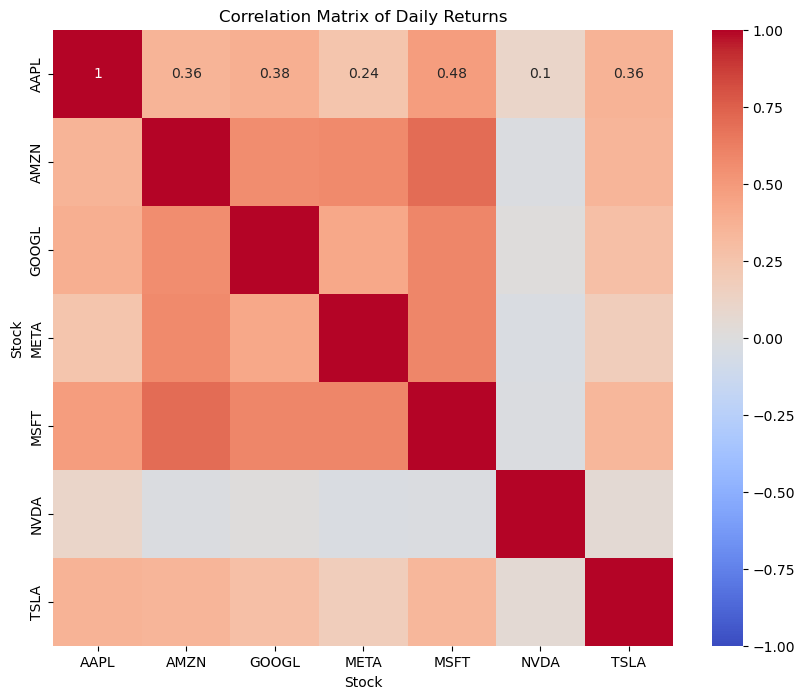

In [60]:
# Correlation Heatmap
# Examine the correlation between the daily returns of different stocks to assess their relationships.returns = data.pivot_table(index='date', columns='Stock', values='Daily_Return')

# Calculate correlation matrix
corr_matrix = returns.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

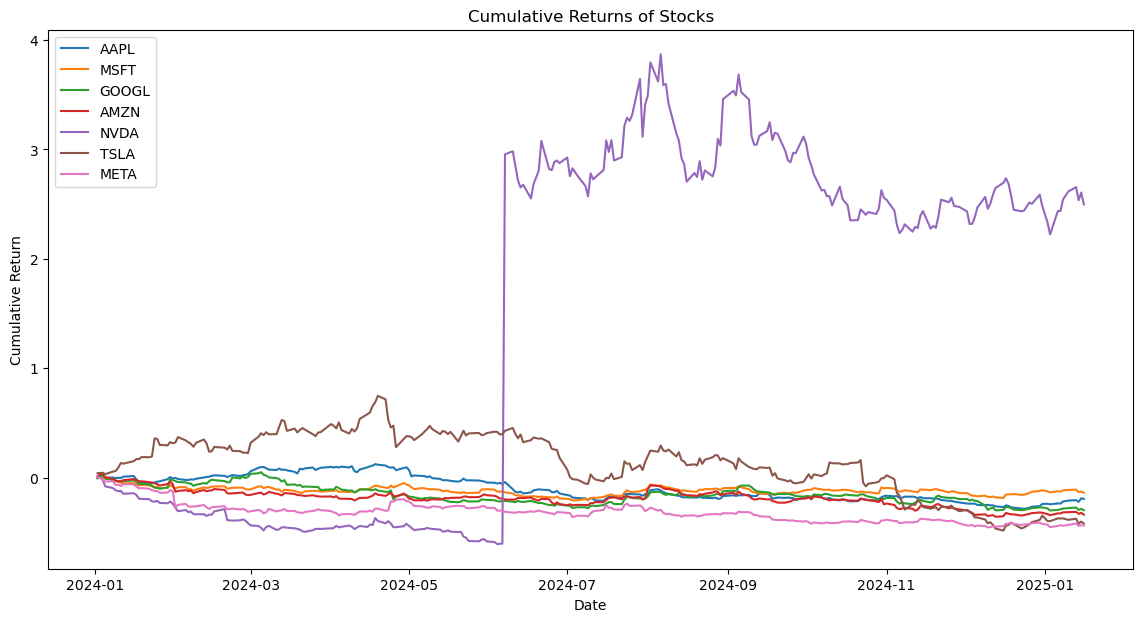

In [64]:
# Cumulative Returns Comparison

# Compare the cumulative returns of each stock starting from a common baseline to evaluate their performance over time.# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plotting
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)

plt.title('Cumulative Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

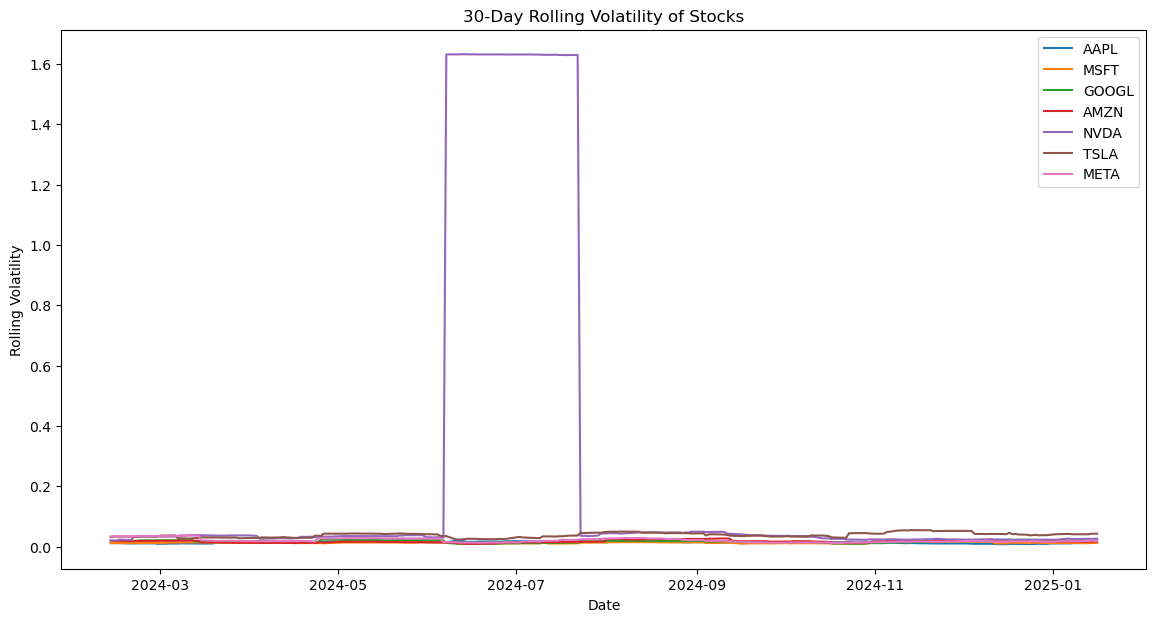

In [68]:
# Rolling Volatility

# Visualize the rolling standard deviation of daily returns to assess the changing volatility of each stock over time# Calculate rolling volatility (standard deviation) with a 30-day window
rolling_volatility = returns.rolling(window=30).std()

# Plotting
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(rolling_volatility.index, rolling_volatility[stock], label=stock)

plt.title('30-Day Rolling Volatility of Stocks')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.legend()
plt.show()
# Calculate rolling volatility (standard deviation) with a 30-day window
rolling_volatility = returns.rolling(window=30).std()
